# Import Ports
This example shows how to import operations. In this example, we are going to

- Download an example board
- Create a configuration file
  - Add a cutout operation
- Import the configuration file

## Import the required packages

In [1]:
import json
from pathlib import Path
import tempfile

from ansys.aedt.core.examples.downloads import download_file

from pyedb import Edb

AEDT_VERSION = "2025.1"
NG_MODE = False


Download the example PCB data.

In [2]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")
file_edb = download_file(source="edb/ANSYS-HSD_V1.aedb", local_path=temp_folder.name)

## Load example layout and place ports

In [3]:
edbapp = Edb(file_edb, edbversion=AEDT_VERSION)
ports = [
    {
        "name": "Port_U1_P",
        "reference_designator": "U1",
        "positive_terminal": {
            "net": "PCIe_Gen4_TX3_CAP_P"
        },
        "negative_terminal": {
            "net": "GND"
        },
        "type": "circuit"
    },
    {
        "name": "Port_U1_N",
        "reference_designator": "U1",
        "positive_terminal": {
            "net": "PCIe_Gen4_TX3_CAP_N"
        },
        "negative_terminal": {
            "net": "GND"
        },
        "type": "circuit"
    },
    {
        "name": "Port_X1_P",
        "reference_designator": "X1",
        "positive_terminal": {
            "net": "PCIe_Gen4_TX3_P"
        },
        "negative_terminal": {
            "net": "GND"
        },
        "type": "circuit"
    },
    {
        "name": "Port_X1_N",
        "reference_designator": "X1",
        "positive_terminal": {
            "net": "PCIe_Gen4_TX3_N"
        },
        "negative_terminal": {
            "net": "GND"
        },
        "type": "circuit"
    }
]
cfg_1 = {"ports": ports}

PyAEDT INFO: Logger is initialized in EDB.


PyAEDT INFO: legacy v0.50.0


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.1


PyAEDT INFO: Cell main Opened


PyAEDT INFO: Builder was initialized.


PyAEDT INFO: EDB initialized.


In [4]:
edbapp.configuration.load(cfg_1)
edbapp.configuration.run()
edbapp.save()
edb_path = edbapp.edbpath
edbapp.close()

PyAEDT INFO: EDB file save time: 0.00ms


PyAEDT INFO: EDB file release time: 0.00ms


True

## Cutout by nets

Keywords

- **reference_list**. List of reference nets.
- **Extent_type**. Supported types are `Conforming`, `ConvexHull`, and `Bounding`.
- **signal_list**. List of signal nets to keep.
- **expansion_size**. Expansion size ratio in meters. The default is ``0.002``.
- **use_round_corner**. Whether to use round corners. Defaults to `False`.
- **number_of_threads**. Number of threads to use. Defaults to `4`.
- **extent_defeature**. Simplifies geometry before applying cutout to aid meshing. Only applies to Conforming bounding box. Defaults to `0` (disabled).
- **remove_single_pin_components**. Removes all single-pin RLCs after cutout. Defaults to `False`.
- **custom_extent**. List of points defining the custom cutout shape. Overrides the `extent_type` setting.
- **custom_extent_units**. Units of the custom extent points. Defaults to `"mm"`. Only valid if `custom_extent` is provided.
- **include_partial_instances**. Includes padstacks with bounding boxes intersecting the custom shape. May slow down export. Only valid with `custom_extent` and `use_pyaedt_cutout`.
- **keep_voids**. Whether to keep voids intersecting the cutout polygon. Defaults to `True`. Valid only if `custom_extent` is provided.
- **check_terminals**. Expands extent to include reference terminals of components with associated models.
- **include_pingroups**. Includes terminals of pingroups. Requires `check_terminals` to be `True`.
- **expansion_factor**. Computes the maximum between dielectric thickness and trace width (for nets with ports) multiplied by this factor. Defaults to `0` (disabled). Works only with `use_pyaedt_cutout`.
- **maximum_iterations**. Maximum number of iterations allowed for cutout search. Defaults to `10`.
- **preserve_components_with_model**. Preserves all pins of components with associated models (Spice or NPort). Only applicable for PyAEDT cutouts (excluding point list).
- **simple_pad_check**. Uses pad center for intersection detection instead of bounding box. Defaults to `True`. Bounding box method is slower and disables multithreading.
- **keep_lines_as_path**. Keeps lines as `Path` instead of converting to `PolygonData`. Only works in Electronics Desktop (3D Layout). May cause issues in SiWave. Defaults to `False`.
- **include_voids_in_extents**. Includes voids in the computed extent (for Conforming only). May affect performance. Defaults to `False`.

In [5]:
cutout = {
    "reference_list": ["GND"],
    "extent_type": "ConvexHull",
    "signal_list": [
        "PCIe_Gen4_TX3_CAP_P",
        "PCIe_Gen4_TX3_CAP_N",
        "PCIe_Gen4_TX3_P",
        "PCIe_Gen4_TX3_N"
    ]
}
operations = {"cutout": cutout}
cfg = {"operations": operations}

Write configuration into as json file

In [6]:
file_json = Path(temp_folder.name) / "cutout_1.json"
with open(file_json, "w") as f:
    json.dump(cfg, f, indent=4, ensure_ascii=False)

Apply cutout

PyAEDT INFO: Logger is initialized in EDB.


PyAEDT INFO: legacy v0.50.0


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.1


PyAEDT INFO: Cell main Opened


PyAEDT INFO: Builder was initialized.


PyAEDT INFO: EDB initialized.


PyAEDT INFO: Cutout Multithread started.


PyAEDT INFO: Net clean up Elapsed time: 0m 1sec


PyAEDT INFO: Extent Creation Elapsed time: 0m 0sec


PyAEDT INFO: 1982 Padstack Instances deleted. Elapsed time: 0m 1sec


PyAEDT INFO: 443 Primitives deleted. Elapsed time: 0m 4sec


PyAEDT INFO: 984 components deleted


PyAEDT INFO: Cutout completed. Elapsed time: 0m 6sec


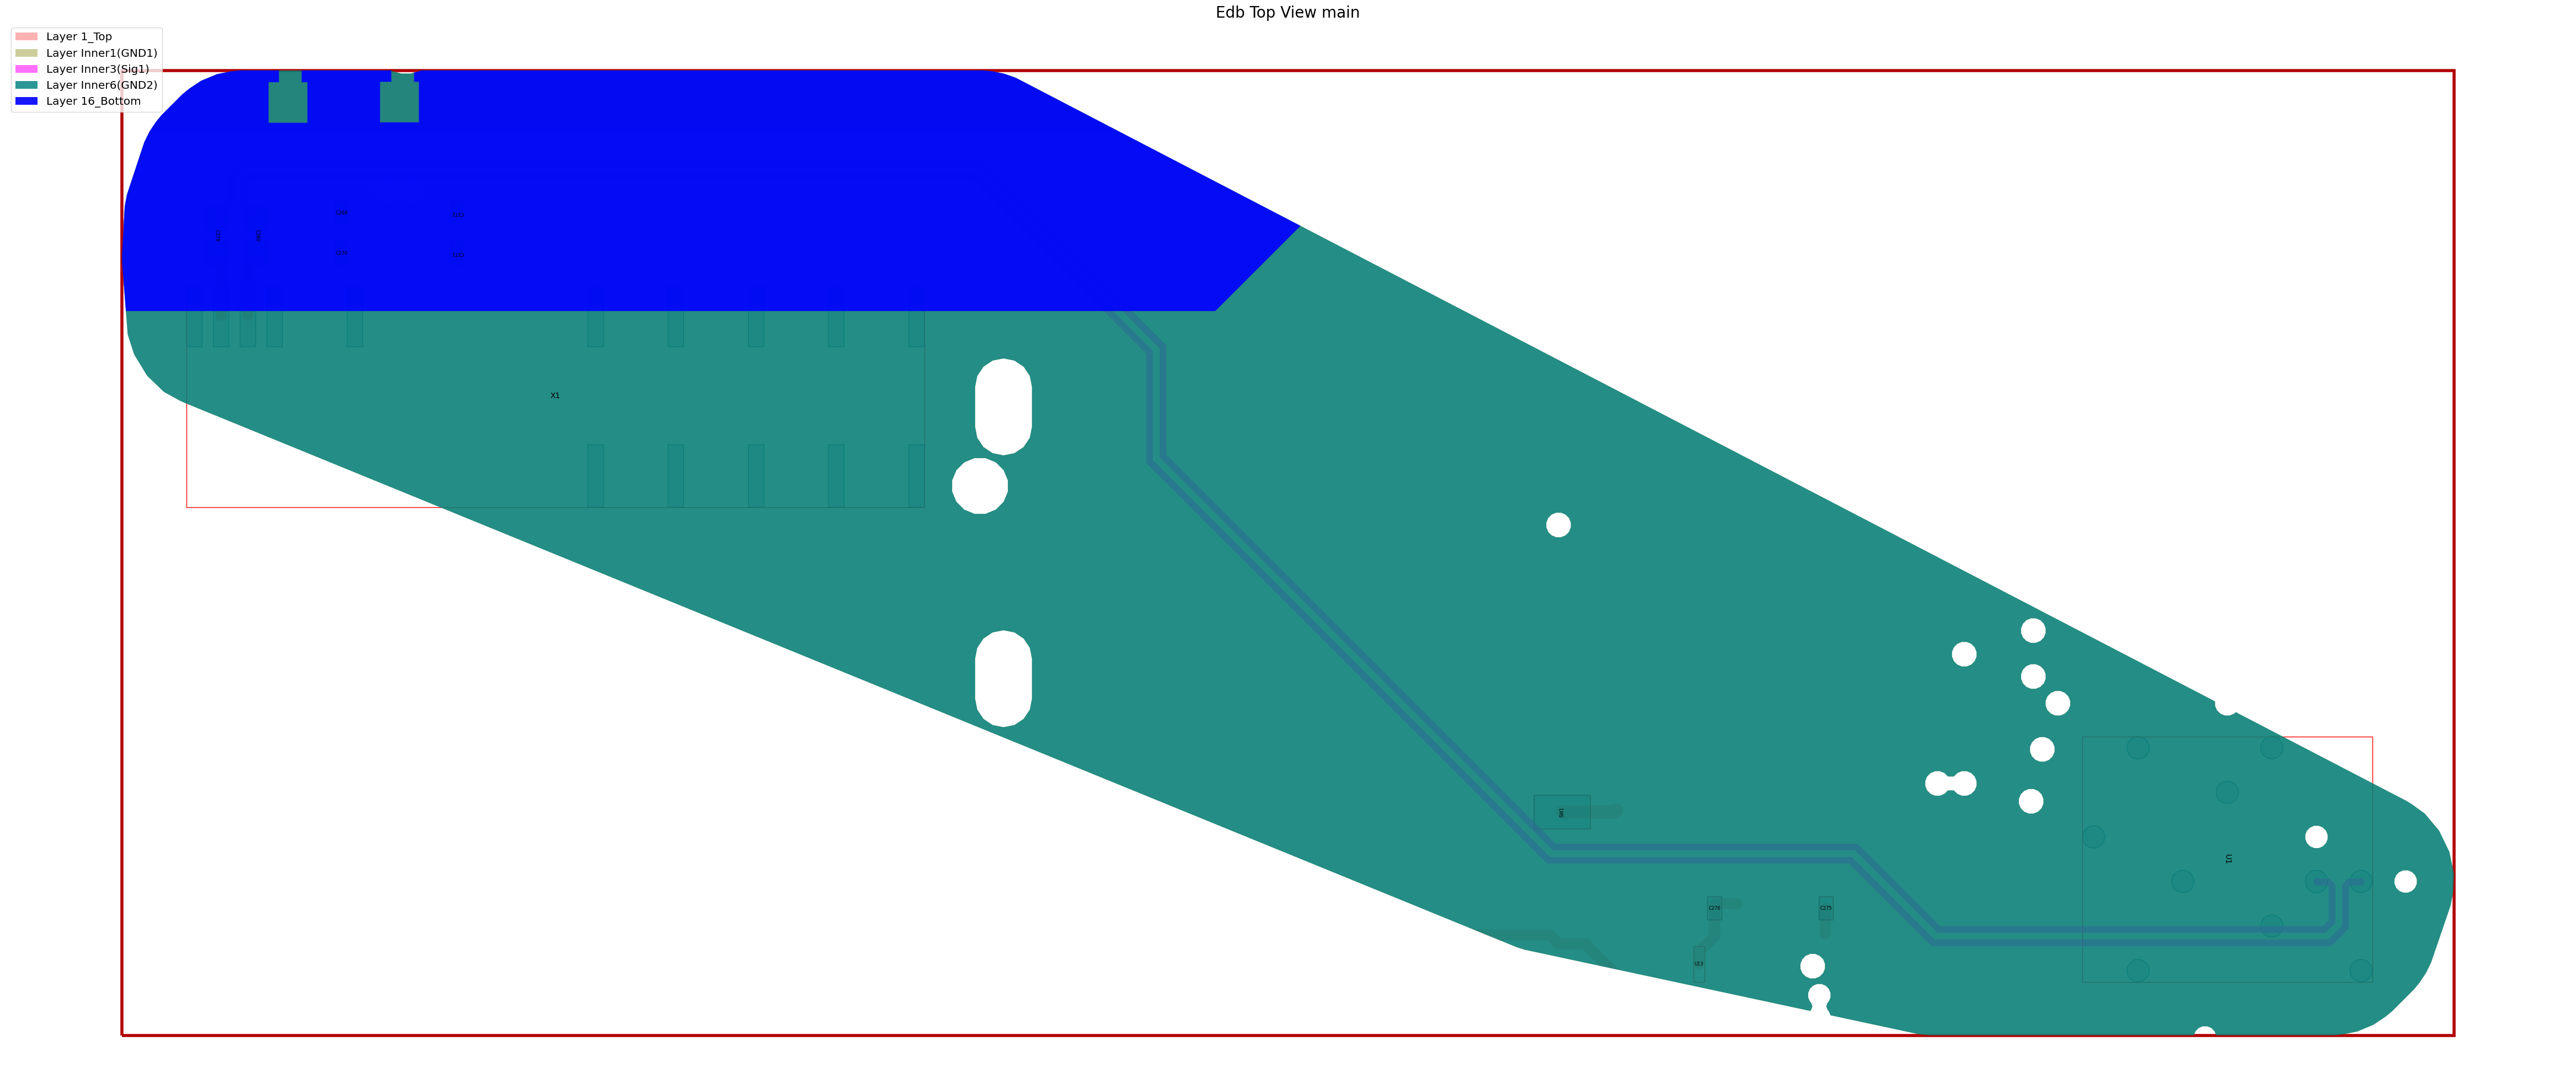

PyAEDT INFO: Plot Generation time 1.125


PyAEDT INFO: EDB file release time: 0.00ms


True

In [7]:
edbapp = Edb(edb_path, edbversion=AEDT_VERSION)
edbapp.configuration.load(config_file=file_json)
edbapp.configuration.run()
edbapp.nets.plot()
edbapp.close()

## Cutout with auto net identification

Keywords

- **auto_identify_nets**. Identify nets connected to ports
   - **enabled**. Resistance threshold. Resistor with value below this threshold is considered as short circuit
   - **resistor_below**. Resistance threshold. Resistor with value below this threshold is considered as short circuit
   - **inductor_below**. Inductor threshold. Inductor with value below this threshold is considered as short circuit
   - **capacitor_above**. Capacitor threshold. Capacitor with value below this threshold is considered as short circuit

In [8]:
cutout = {
    "auto_identify_nets": {
            "enabled": True,
            "resistor_below": 100,
            "inductor_below": 1,
            "capacitor_above": 1
        },
    "reference_list": ["GND"],
    "extent_type": "ConvexHull"
}
operations = {"cutout": cutout}
cfg = {"operations": operations}

Write configuration into as json file

In [9]:
file_json = Path(temp_folder.name) / "cutout_2.json"
with open(file_json, "w") as f:
    json.dump(cfg, f, indent=4, ensure_ascii=False)

Apply cutout

PyAEDT INFO: Logger is initialized in EDB.


PyAEDT INFO: legacy v0.50.0


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.1


PyAEDT INFO: Cell main Opened


PyAEDT INFO: Builder was initialized.


PyAEDT INFO: EDB initialized.


PyAEDT INFO: Cutout Multithread started.


PyAEDT INFO: Net clean up Elapsed time: 0m 1sec


PyAEDT INFO: Extent Creation Elapsed time: 0m 0sec


PyAEDT INFO: 1982 Padstack Instances deleted. Elapsed time: 0m 1sec


PyAEDT INFO: 443 Primitives deleted. Elapsed time: 0m 4sec


PyAEDT INFO: 984 components deleted


PyAEDT INFO: Cutout completed. Elapsed time: 0m 6sec


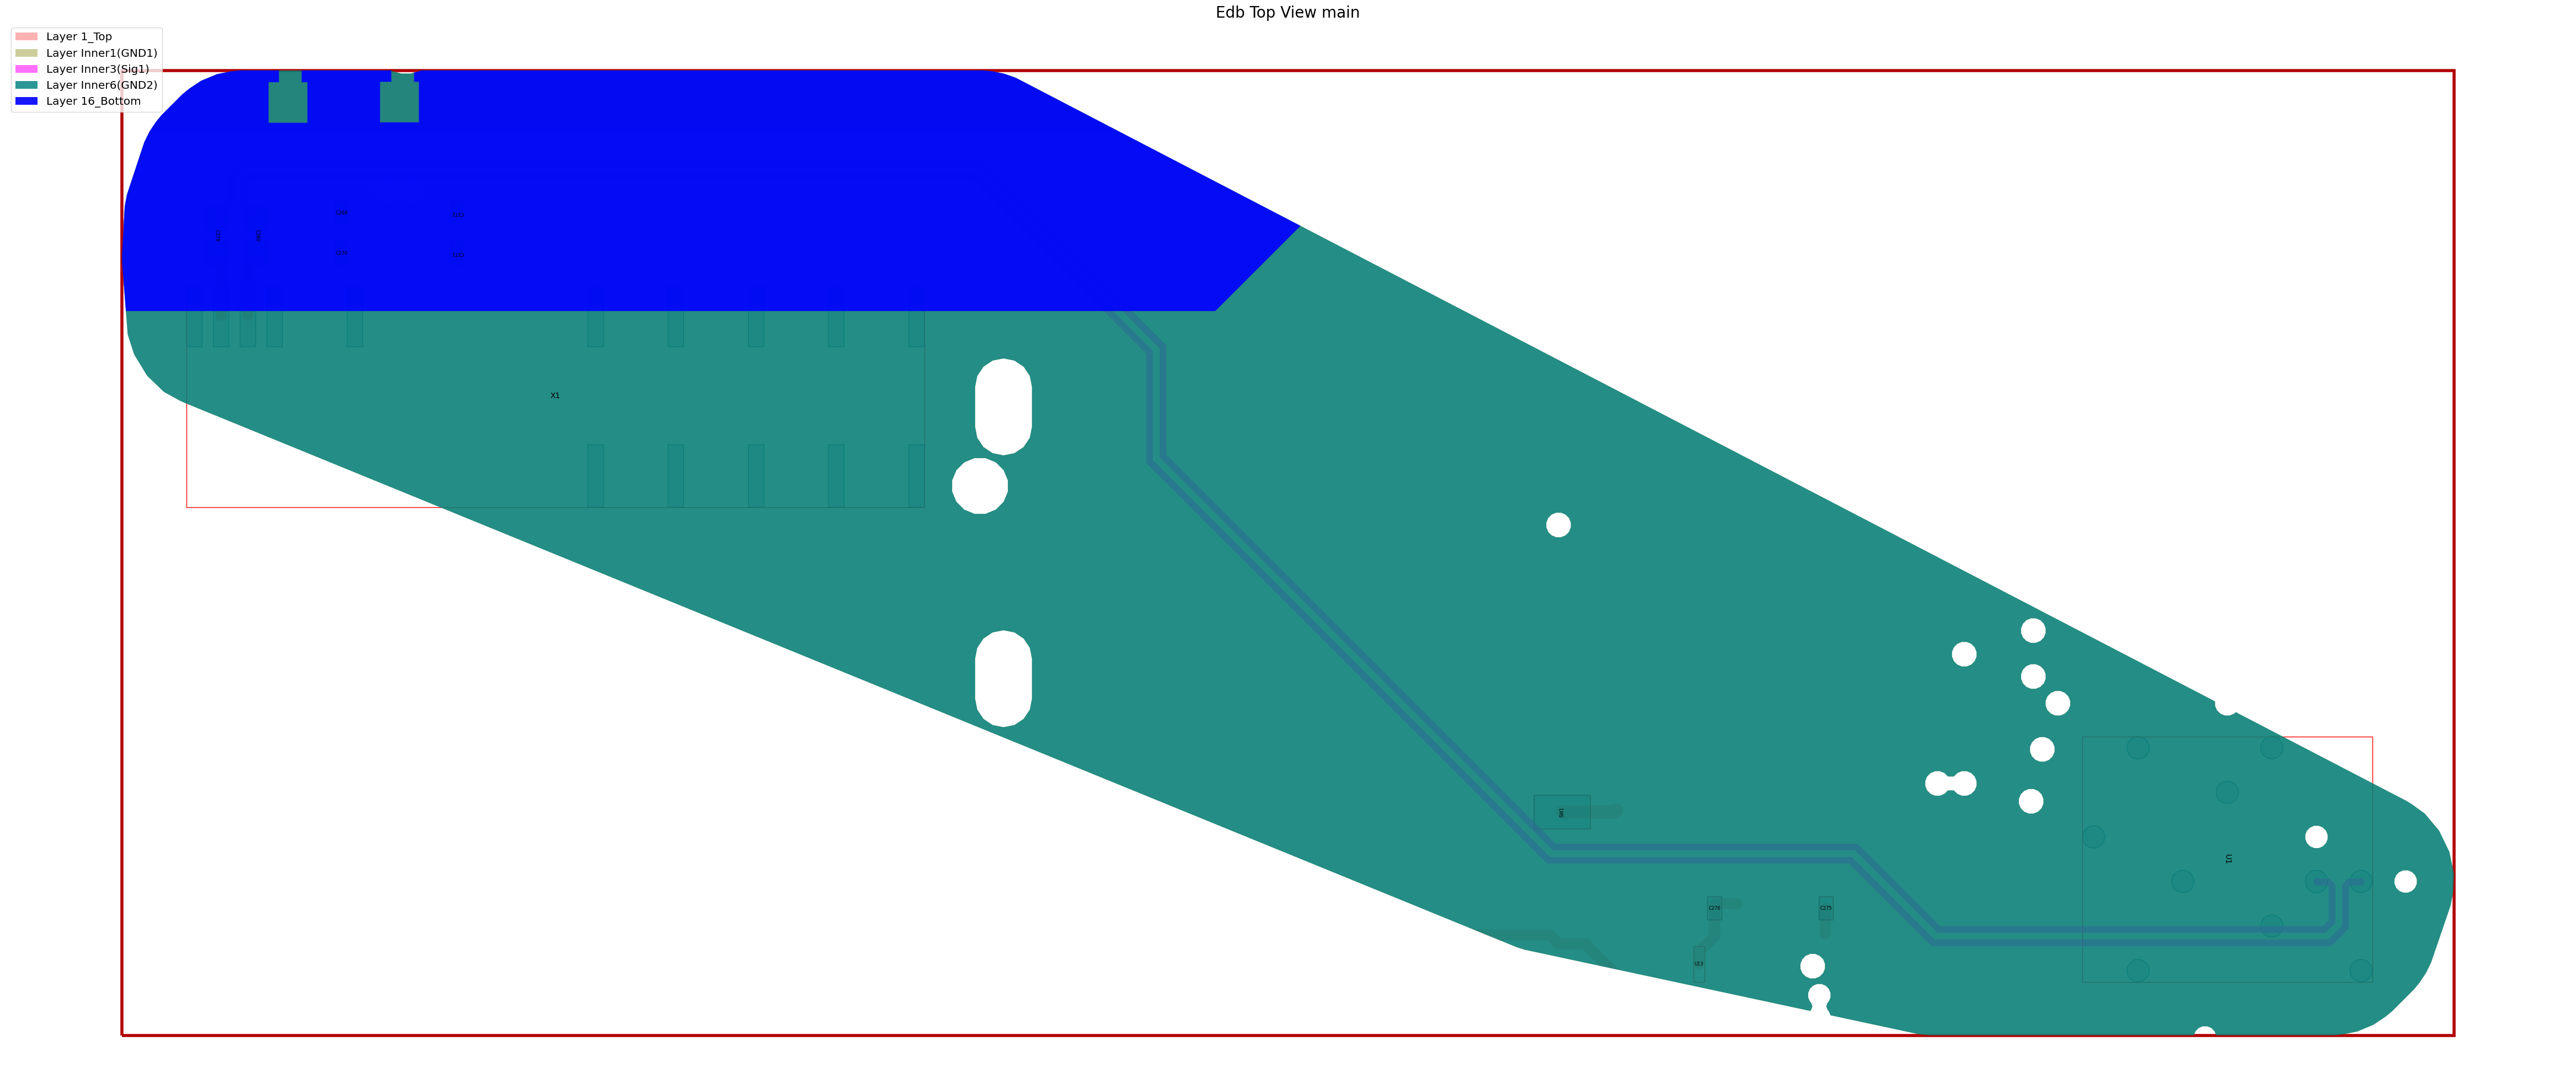

PyAEDT INFO: Plot Generation time 1.031


PyAEDT INFO: EDB file release time: 0.00ms


True

In [10]:
edbapp = Edb(edb_path, edbversion=AEDT_VERSION)
edbapp.configuration.load(config_file=file_json)
edbapp.configuration.run()
edbapp.nets.plot()
edbapp.close()